list of Fastai techniques [here](https://blog.floydhub.com/ten-techniques-from-fast-ai/) <br>
cifar10 models : [here](https://github.com/kuangliu/pytorch-cifar) <br>
Torchsamples has the same structure : [here](https://github.com/ncullen93/torchsample)

TODO
- freeze layer
- train multiple size of image
- save model (& reset model)
- early stop
- data loader wrapper

In [1]:
%reload_ext autoreload
%autoreload 2
import torch
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import transforms
import torchvision
import copy
from exitai.learner import Learner

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(1)

In [3]:
transform_train = transforms.Compose([
                                   transforms.RandomCrop(32, padding=4),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.RandomAffine(15, scale=(.9,1.2)),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,), (1,))
                               ])
transform_test = transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,), (1,))
                               ])
mnist_trainset = datasets.CIFAR10(root='../../data', train=True, download=True, transform=transform_train)
mnist_testset = datasets.CIFAR10(root='../../data', train=False, download=False, transform=transform_test)
data_loader_train = DataLoader(mnist_trainset, 64, shuffle=True, num_workers=8)
data_loader_test = DataLoader(mnist_testset, 64, shuffle=True, num_workers=8)

Files already downloaded and verified


In [4]:
import models.RestNet as RestNet
model = RestNet.ResNet18() # copy from model link no the top of notebook
criterion = nn.CrossEntropyLoss()
def model_loss_func(input_data, model, phase):
    input, target = input_data
    output = model(input)
    return output, criterion(output, target)

### Train

### Find learning rate

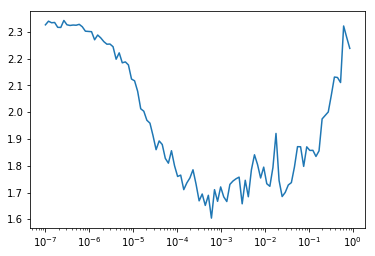

In [13]:
model = RestNet.ResNet18()
learner = Learner(data_loader_train, data_loader_test, model)
learner.lr_find(model_loss_func, 1e-7, 1)

### Train with static lr

In [16]:
model = RestNet.ResNet18()
learner = Learner(data_loader_train, data_loader_test, model)
learner.fit(model_loss_func, 0.03, 50, cycle=None)

---- epoch:0 ------
   [train] Average loss: 2.9345, acc: 29.99%
   [test] Average loss: 3.1874, acc: 32.54%
---- epoch:1 ------
   [train] Average loss: 2.3256, acc: 45.36%
   [test] Average loss: 2.1786, acc: 50.81%
---- epoch:2 ------
   [train] Average loss: 1.9785, acc: 54.47%
   [test] Average loss: 2.1613, acc: 52.38%
---- epoch:3 ------
   [train] Average loss: 1.7378, acc: 60.46%
   [test] Average loss: 1.5154, acc: 65.55%
---- epoch:4 ------
   [train] Average loss: 1.5740, acc: 64.39%
   [test] Average loss: 1.4121, acc: 68.40%
---- epoch:5 ------
   [train] Average loss: 1.4196, acc: 68.19%
   [test] Average loss: 1.3811, acc: 69.52%
---- epoch:6 ------
   [train] Average loss: 1.3034, acc: 70.84%
   [test] Average loss: 1.1524, acc: 74.59%
---- epoch:7 ------
   [train] Average loss: 1.2014, acc: 73.35%
   [test] Average loss: 1.0415, acc: 76.95%
---- epoch:8 ------
   [train] Average loss: 1.1139, acc: 75.44%
   [test] Average loss: 0.9527, acc: 79.42%
---- epoch:9 ------

### Train with cos annealing lr

In [5]:
model = RestNet.ResNet18()
learner = Learner(data_loader_train, data_loader_test, model)
learner.fit(model_loss_func, lr=[0.001, 0.1], num_epochs=100)

---- epoch:0 ------
   [train] Average loss: 3.2887, acc: 20.03%
   [test] Average loss: 2.6984, acc: 33.78%
---- epoch:1 ------
   [train] Average loss: 2.4099, acc: 42.36%
   [test] Average loss: 2.1218, acc: 49.43%
---- epoch:2 ------
   [train] Average loss: 2.3569, acc: 44.34%
   [test] Average loss: 2.0024, acc: 53.28%
---- epoch:3 ------
   [train] Average loss: 1.9767, acc: 53.99%
   [test] Average loss: 1.8438, acc: 58.71%
---- epoch:4 ------
   [train] Average loss: 1.6835, acc: 61.06%
   [test] Average loss: 1.4312, acc: 67.87%
---- epoch:5 ------
   [train] Average loss: 1.4788, acc: 66.24%
   [test] Average loss: 1.3272, acc: 69.97%
---- epoch:6 ------
   [train] Average loss: 1.7754, acc: 59.60%
   [test] Average loss: 1.5047, acc: 66.14%
---- epoch:7 ------
   [train] Average loss: 1.5967, acc: 63.55%
   [test] Average loss: 1.4174, acc: 68.04%
---- epoch:8 ------
   [train] Average loss: 1.4535, acc: 67.23%
   [test] Average loss: 1.2261, acc: 72.41%
---- epoch:9 ------